### [Experiment] Evaluate how the uncertainty sampling algorithm with a gaussian prior reacts to different oracles

From the evaluation two results are interesting:
- In the case of random rating, we still improve with a gaussian prior in comparison to no prior at all (past mean). This means the gaussian prior even learns something about the random distribution of the labelling. The Baysian error (because of the 'noise' in rating. Is the reason for not converging further than 0.05
- In all cases, the accuracy increases very rapidly with the new method.

Overall, there are a few things to take into account in further exeriments:
- The examples are only one run each. It would be sensible to start them repeatedly with different random seeds and average over the result to prevent overfitting a specific 'randomness'.
- During the implementation I found myself with a new idea for a rating function: A function that would rate the paths based on the relative length to all other paths. While this does not challenge the assumption, that all examples are labeled independently, it got me thinking about how the users rated the paths in our study. They did not know how many paths they had to rate and they had never seen the scope of the meta-paths that could possibly be shown to them before. Their rating clearly depended on the paths they rated previously. This puts the knowledge we gain with every rating into a new perspective. Since this perspective is relative, it might not be the problem in any case.

In [1]:
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from active_learning.evaluation import *

In [3]:
test_cases = []
for oracle in ORACLES:
    for k, v in oracle.options().items():
        for i in v:
            test_cases.append((oracle,{k:i}))

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


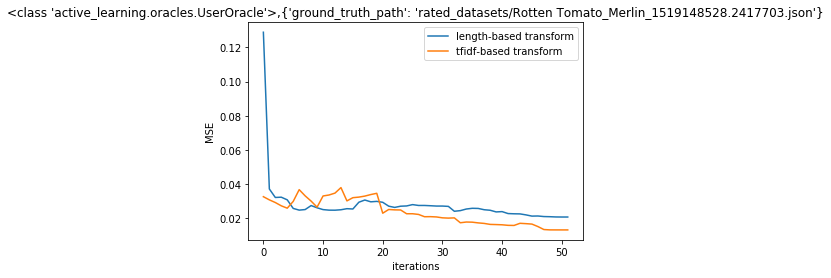

C:\Users\Freya\Anaconda3\envs\Basic\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


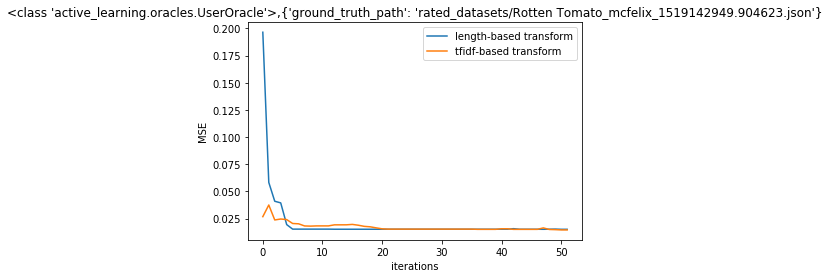

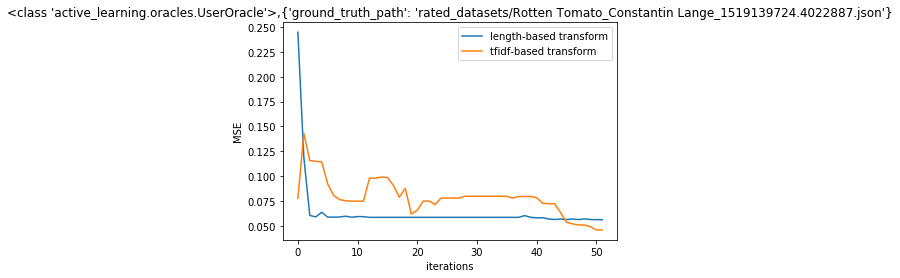

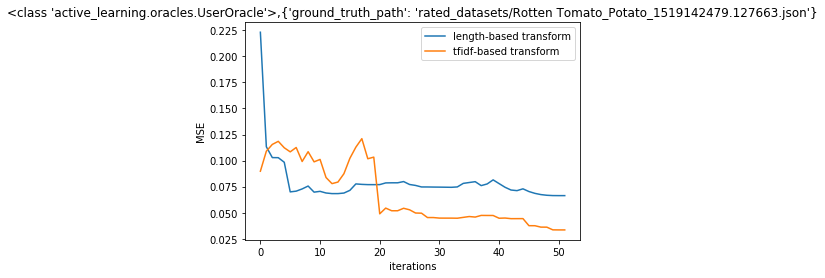

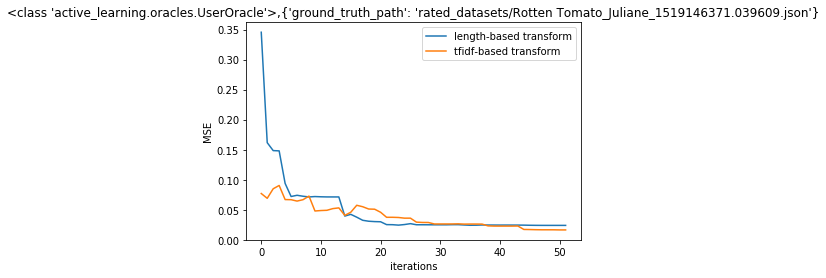

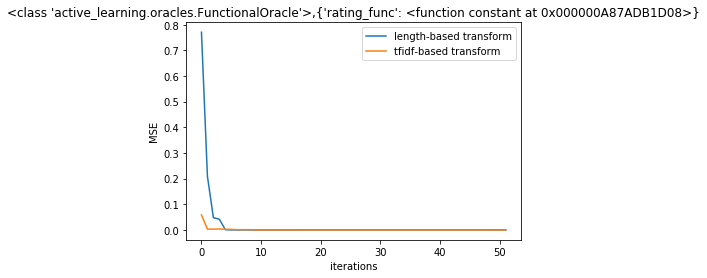

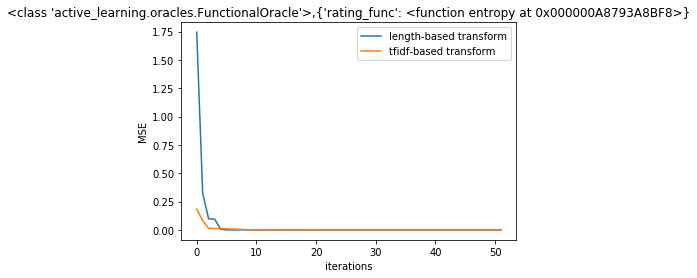

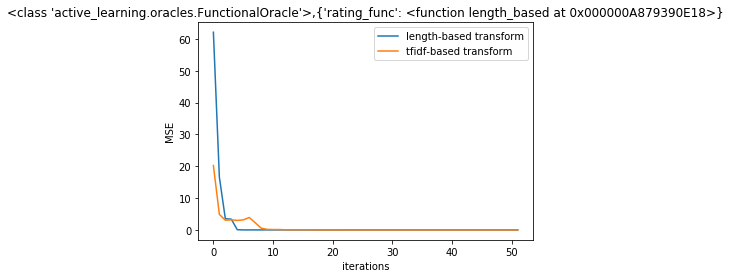

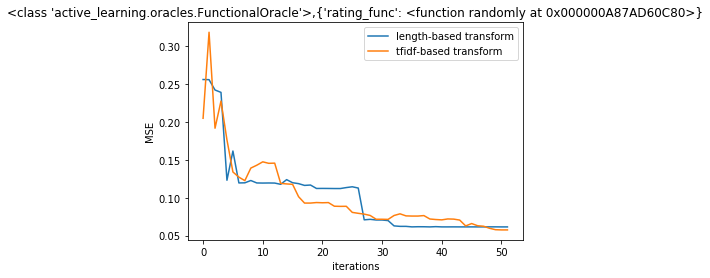

In [4]:
algorithm = UncertaintySamplingAlgorithm
algo_params_length = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'length'}}
algo_params_tfidf = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'tfidf'}}

for oracle, oracle_params in test_cases:
    stats_length = Evaluator(algorithm=algorithm, algo_params=algo_params_length,
                     oracle=oracle, oracle_params=oracle_params,
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    stats_tfidf = Evaluator(algorithm=algorithm, algo_params=algo_params_tfidf,
                     oracle=oracle, oracle_params=oracle_params,
                     batch_size=1, dataset_name='Rotten Tomato').compute()
    ax = stats_length['mse'].plot(title='{},{}'.format(oracle,oracle_params),label='length-based transform')
    stats_tfidf['mse'].plot(label='tfidf-based transform')
    ax.legend()
    plt.ylabel('MSE')
    plt.xlabel('iterations')
    plt.show()